In [1]:
# Loading the relevant libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2
from skimage.transform import resize
import pickle

In [2]:
with open('crop_resized_images.pkl', 'rb') as file:
    X_array = pickle.load(file)

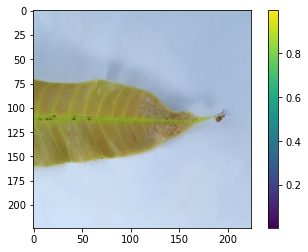

In [3]:
plt.figure()
plt.imshow(X_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
%store -r y_array

In [5]:
train_images, test_images, train_labels, test_labels = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
image_height = 224
image_width = 224
num_channels = 3  
num_classes = 8  
num_epochs = 10
batch_size = 15

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/10
214/214 [==============================] - 212s 966ms/step - loss: 1.4924 - accuracy: 0.4350 - val_loss: 1.1032 - val_accuracy: 0.5900
Epoch 2/10
214/214 [==============================] - 193s 903ms/step - loss: 0.8257 - accuracy: 0.6916 - val_loss: 0.5867 - val_accuracy: 0.8025
Epoch 3/10
214/214 [==============================] - 192s 898ms/step - loss: 0.5921 - accuracy: 0.7862 - val_loss: 0.5115 - val_accuracy: 0.8012
Epoch 4/10
214/214 [==============================] - 194s 903ms/step - loss: 0.4316 - accuracy: 0.8394 - val_loss: 0.3414 - val_accuracy: 0.8850
Epoch 5/10
214/214 [==============================] - 178s 833ms/step - loss: 0.3514 - accuracy: 0.8788 - val_loss: 0.2497 - val_accuracy: 0.9225
Epoch 6/10
 19/214 [=>............................] - ETA: 2:35 - loss: 0.2221 - accuracy: 0.9298

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

keras_classifier = KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=batch_size)

train_sizes, train_scores, test_scores = learning_curve(
    keras_classifier, train_images, train_labels, cv=3, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, test_mean, label='Validation')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()
